# Image filtering methods

## 1. Statistical filters

### Load test images:

Adding noise to images:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
from skimage import data
from skimage import img_as_ubyte

img = data.camera()

## Noisy image: Add some noise by randomly setting some pixels to 0 or 255 (salt and pepper noise)
noise = np.random.random(img.shape) # uniform random numbers between 0 and 1
noisy_image = img_as_ubyte(data.camera())
noisy_image[noise > 0.99] = 255 
noisy_image[noise < 0.01] = 0


def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    
plot_comparison(img,noisy_image,'Salt & Pepper noise')
plt.savefig('Noisy.png')

### Median filters:

In [ ]:
from skimage.morphology import disk
from skimage.filters import median

img = img_as_ubyte(noisy_image)
sel5 = disk(5) # structuring element disk radius 5 pixels
img_med5x5 = median(img, sel5)
plot_comparison(img,img_med5x5,'Median 5x5')
plt.savefig('median.png')

sel25 = disk(25)
img_med25x25 = median(img, sel25)
plot_comparison(img,img_med25x25,'Median 25x25')

### Local averaging filter:

Add Gaussian noise to the image:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
from skimage import data
from skimage import img_as_ubyte

from skimage import data, img_as_float
from skimage.util import random_noise


img = img_as_float(data.chelsea())
sigma = 0.15
noisy_image_normal = random_noise(img, var=sigma**2)

plot_comparison(img,noisy_image_normal,'Gaussian noise')

In [ ]:
from skimage.filters import rank
from skimage.color import rgb2gray

img = img_as_ubyte(rgb2gray(noisy_image_normal))

selem = disk(3) # structuring element 
img_locmed = rank.mean(img, selem=selem)
plot_comparison(img,img_locmed,'Local mean with disk 3x3')
plt.savefig('Local_mean.png')

## 2. Morphological Filtering

### Erosion and dilation:

In [ ]:
import os
import matplotlib.pyplot as plt
from skimage.data import data_dir
from skimage.util import img_as_ubyte
from skimage import io

orig_phantom = img_as_ubyte(io.imread(os.path.join(data_dir, "phantom.png"),
                                      as_gray=True))

from skimage.morphology import erosion, dilation
from skimage.morphology import disk

selem = disk(5)
eroded = erosion(orig_phantom, selem)
plot_comparison(orig_phantom, eroded, 'erosion')
plt.savefig('erosion.png')

dilated = dilation(orig_phantom, selem)
plot_comparison(orig_phantom, dilated, 'dilation')
plt.savefig('dilation.png')


### Top-Hat morphological 

https://en.wikipedia.org/wiki/Top-hat_transform

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import color, morphology

image = color.rgb2gray(data.hubble_deep_field())[:500, :500]

footprint = morphology.disk(2)
res = morphology.white_tophat(image, footprint)

fig, ax = plt.subplots(ncols=3, figsize=(20, 8))
ax[0].set_title('Original')
ax[0].imshow(image, cmap='gray')
ax[1].set_title('White tophat')
ax[1].imshow(res, cmap='gray')
ax[2].set_title('Complementary')
ax[2].imshow(image - res, cmap='gray')

plt.show()

## 3. Spatial filters:

### 2D convolution:

In [ ]:
import numpy as np 
I = np.array([[0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 1, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0]])
h = np.array([[1,2,3],[4,5,6],[7,8,9]])

from scipy import ndimage
Iconv = ndimage.convolve(I, h, mode='constant', cval=0.0)
Iconv

### Gaussian filters:

In [ ]:
from skimage import data
from skimage.filters import gaussian
from skimage.color import rgb2gray

img = data.astronaut()
img = rgb2gray(img)

img_f = gaussian(img, 3)
plot_comparison(img,img_f, 'Gaussian filter 3x3')
plt.savefig('gaussian.png')


img_f = gaussian(img, 5)
plot_comparison(img,img_f, 'Gaussian filter 5x5')

### Edge detection: Sobel and Roberts gradient operators

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import roberts, sobel

image = camera()

edge_roberts = roberts(image)
plot_comparison(image,edge_roberts, 'Roberts edge detector')
plt.savefig('roberts_edges.png')


edge_sobel = sobel(image)
plot_comparison(image,edge_sobel, 'Sobel edge detector')

### Enhancing contours: Laplacian filters: 

In [ ]:
from skimage import data
from skimage.filters import laplace
from skimage.color import rgb2gray

img_f = laplace(image, 3)
plot_comparison(image,img_f, 'Laplacian filter 3x3')
plt.savefig('laplacian.png')


img_f = laplace(image, 25)
plot_comparison(image,img_f, 'Laplacian filter 25x25')

## 4. Filtering in the frequency domain:

Using the FFT and the Convolution theorem:


First we obtain the 2D Discrete Fourier Transform of the image (FFT algorithm):


In [ ]:
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from matplotlib import pyplot as plt

img = data.astronaut()
img = rgb2gray(img)


f = np.fft.fft2(img) # Discrete Fourier Transform using FFT algorithm
fshift = np.fft.fftshift(f) # Shift to have zero frequency (origin) at the center of the image
magnitude_spectrum = 20*np.log(np.abs(fshift)) # Logarithmic scale for better visualization of the differences in powert spectrum

fig = plt.figure(figsize=(14, 6))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.savefig('frequency.png')
plt.show()


### High-pass filter: 

Just remove the regions with lower frequencies near the origin of the DFT. Then obtain the filtered image by applying the inverse discrete Fourier transform to the result:

In [ ]:
rows, cols = img.shape
crow,ccol = np.int(rows/2) , np.int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plot_comparison(img,img_back, 'High-pass filter in the frequency domain')

### Low-pass filter: 

Just remove the regions with higher frequencies far from the origin of the DFT. Then obtain the filtered image by applying the inverse discrete Fourier transform to the result:

In [ ]:
nrows, ncols = img.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
disk_diameter = 50
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (disk_diameter)**2)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fshift[outer_disk_mask] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig = plt.figure(figsize=(5,5))
plt.imshow(outer_disk_mask,cmap=plt.cm.gray)
plt.title('LPF mask disk with diameter {} pixels'.format(disk_diameter))
plt.show()

plot_comparison(img,img_back, 'Low-pass filter diameter {} pixels'.format(disk_diameter))

Let's increase the disk diameter and therefore the frequencies that are kept in the filter: Since we remove less high-frequency content of the spactrum, the filtered image retains more detail than in the previous example:

In [ ]:
disk_diameter = 100
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (disk_diameter)**2)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fshift[outer_disk_mask] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig = plt.figure(figsize=(5,5))
plt.imshow(outer_disk_mask,cmap=plt.cm.gray)
plt.title('LPF mask disk with diameter {} pixels'.format(disk_diameter))
plt.show()
plot_comparison(img,img_back, 'Low-pass filter diameter {} pixels'.format(disk_diameter))

# Exercises
Generate a single Python notebook implementing and answering the following questions: 

- Task 1: Load the built-in image 'coffee' of the skimage libraries. Details can be found at https://scikit-image.org/docs/stable/auto_examples/data/plot_general.html#sphx-glr-auto-examples-data-plot-general-py

- Task 2: Use the skimage function random_noise to add each of the 7 different types of noise available and generate a 4x2 panel figure with the original image and the 7 corrupted versions. The noise types are:

* ‘gaussian’ Gaussian-distributed additive noise.
* ‘localvar’ Gaussian-distributed additive noise, with specified
local variance at each point of image.
* ‘poisson’ Poisson-distributed noise generated from the data.
* ‘salt’ Replaces random pixels with 1.
* ‘pepper’ Replaces random pixels with 0 (for unsigned images) or
-1 (for signed images).
* ‘s&p’ Replaces random pixels with either 1 or low_val, where
low_val is 0 for unsigned images or -1 for signed images.
* ‘speckle’ Multiplicative noise using out = image + n*image, where
n is Gaussian noise with specified mean & variance.

Documentation of the function can be found at
https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.random_noise

- Task 3: Select one of the noise types and generate 3 noisy images with different noise intensity levels. Represent the original image along with them in a 2x2 figure. 

- Task 4: The standard deviation for Gaussian kernel affects the behavior of the gaussian filter (parameter sigma, see documentation https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian). Explore the effect of the parameter sigma when applying a gaussian filter to the tree noisy images generated in the previus task. Represent and comment the results. 

- Task 5: Detect the edges of the bricks in the built-in image 'bricks' using a Prewitt edge detection filter. Quantify what is the fraction of the image corresponding to bricks and to edges. 

- Task 6: Apply a high-pass filter and a low-pass filter in the frequency domain to the skimage built-in image 'grass'. Represent the results and discuss the correspondance between spatial patterns in the original image and high/low frequency components of its the Fourier transform. 

- Task 7: Use the function binary_blobs to generate an image with random blobs: https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.binary_blobs
How many consecutive morphological erosions are needed in order to remove all the blobs? Use a disk-shaped structuring element of radius 3 pixels (footprint). https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.disk 




### Task 1



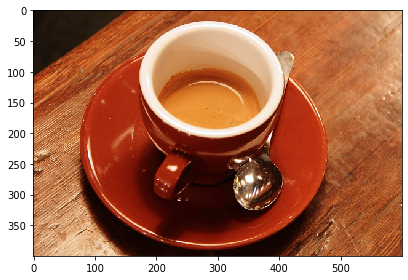

In [1]:
import skimage as sk # load skimage libraries
I = sk.data.coffee() # read image using imread function
sk.io.imshow(I) # visualize image using imshow function
sk.io.show() 

### Task 2
Task 2: Use the skimage function random_noise to add each of the 7 different types of noise available and generate a 4x2 panel figure with the original image and the 7 corrupted versions. The noise types are:

‘gaussian’ Gaussian-distributed additive noise.

‘localvar’ Gaussian-distributed additive noise, with specified local variance at each point of image.

‘poisson’ Poisson-distributed noise generated from the data.

‘salt’ Replaces random pixels with 1.

‘pepper’ Replaces random pixels with 0 (for unsigned images) or

1 (for signed images).

‘s&p’ Replaces random pixels with either 1 or low_val, where low_val is 0 for unsigned images or -1 for signed images.

‘speckle’ Multiplicative noise using out = image + n*image, where n is Gaussian noise with specified mean & variance.

Documentation of the function can be found at https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.random_noise

In [2]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np 
from skimage import data
from skimage import img_as_ubyte

from skimage import data, img_as_float
from skimage.util import random_noise


In [3]:
img = img_as_float(data.coffee())
img_noise = random_noise(img, mode='gaussian')
img_localvar = random_noise(img, mode='localvar')
img_poisson = random_noise(img, mode='poisson')
img_salt = random_noise(img, mode='salt')
img_pepper = random_noise(img, mode='pepper')
img_sp = random_noise(img, mode='s&p')
img_speckle = random_noise(img, mode='speckle')


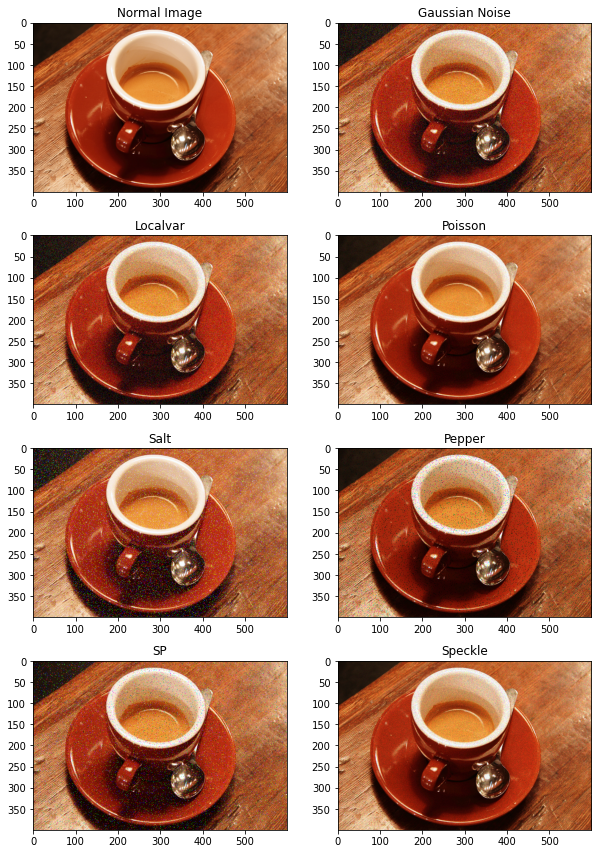

In [4]:
import matplotlib.pyplot as plt
import numpy as np 

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))
ax[0,0].imshow(img)
ax[0,0].set_title('Normal Image')

ax[0,1].imshow(img_noise)
ax[0,1].set_title('Gaussian Noise')

ax[1,0].imshow(img_localvar)
ax[1,0].set_title('Localvar')

ax[1,1].imshow(img_poisson)
ax[1,1].set_title('Poisson')

ax[2,0].imshow(img_salt)
ax[2,0].set_title('Salt')

ax[2,1].imshow(img_pepper)
ax[2,1].set_title('Pepper')

ax[3,0].imshow(img_sp)
ax[3,0].set_title('SP')

ax[3,1].imshow(img_speckle)
ax[3,1].set_title('Speckle')

plt.show()



### Task 3
Task 3: Select one of the noise types and generate 3 noisy images with different noise intensity levels. Represent the original image along with them in a 2x2 figure.

In [5]:
img = img_as_float(data.coffee())
img_salt_l = random_noise(img, mode='salt',amount=0.05)
img_salt_m = random_noise(img, mode='salt',amount=0.3)
img_salt_h = random_noise(img, mode='salt',amount=0.8)

Text(0.5, 1.0, 'High noise intensity level')

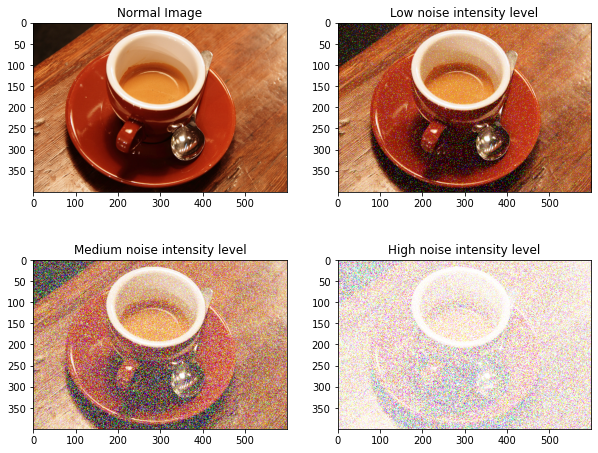

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax[0,0].imshow(img)
ax[0,0].set_title('Normal Image')

ax[0,1].imshow(img_salt_l)
ax[0,1].set_title('Low noise intensity level')

ax[1,0].imshow(img_salt_m)
ax[1,0].set_title('Medium noise intensity level')

ax[1,1].imshow(img_salt_h)
ax[1,1].set_title('High noise intensity level')

### Task 4
The standard deviation for Gaussian kernel affects the behavior of the gaussian filter (parameter sigma, see documentation https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian). Explore the effect of the parameter sigma when applying a gaussian filter to the tree noisy images generated in the previus task. Represent and comment the results.

/usr/local/lib/python3.8/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


Text(0.5, 1.0, 'High noise intensity level')

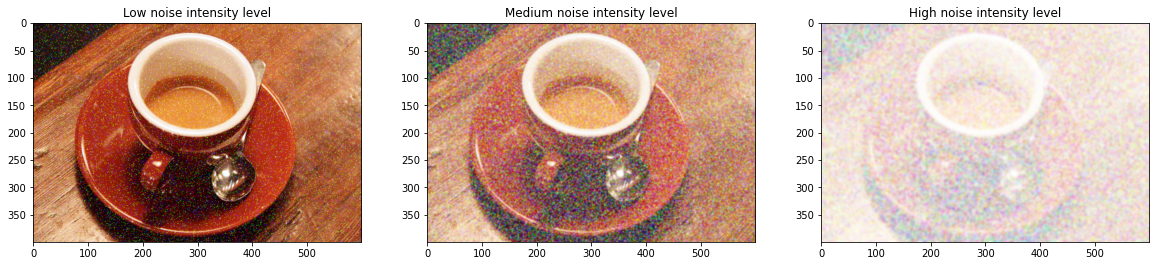

In [7]:
from skimage.filters import gaussian

sigma1 = gaussian(img_salt_l,sigma=0.5)
sigma2 = gaussian(img_salt_m,sigma=1)
sigma3 = gaussian(img_salt_h,sigma=2) 

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 15))
ax[0].imshow(sigma1)
ax[0].set_title('Low noise intensity level')

ax[1].imshow(sigma2)
ax[1].set_title('Medium noise intensity level')

ax[2].imshow(sigma3)
ax[2].set_title('High noise intensity level')


Comments:

We can observe that the three noise generated images in task 3 have been now modified appliying a gaussian filter, which has resulted to three images with the same intensity of noise but with the pixels blurred.

### Task 5
Task 5: Detect the edges of the bricks in the built-in image 'bricks' using a Prewitt edge detection filter. Quantify what is the fraction of the image corresponding to bricks and to edges.

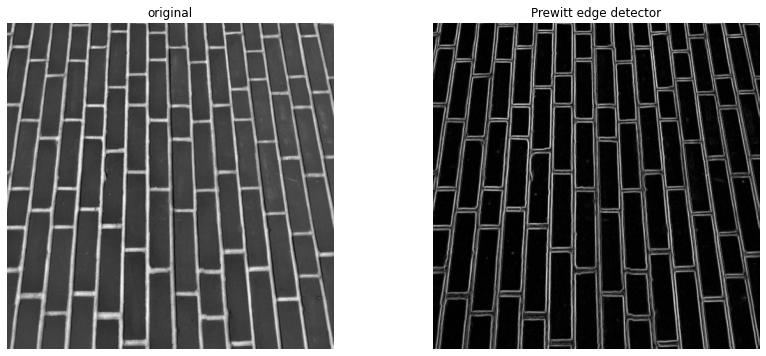

In [8]:
from skimage.data import brick
from skimage.filters import prewitt

img_brick = brick() 

edge_prewitt = prewitt(img_brick)


def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    
plot_comparison(img_brick,edge_prewitt, 'Prewitt edge detector')

In [9]:
shape = edge_prewitt.shape
total_pixels = edge_prewitt.shape[0]*edge_prewitt.shape[1]
white_pixels = edge_prewitt[edge_prewitt==0].shape
black_pixels = edge_prewitt[edge_prewitt==1].shape

shape, total_pixels, white_pixels, black_pixels

((512, 512), 262144, (3737,), (0,))

### Task 6
Task 6: Apply a high-pass filter and a low-pass filter in the frequency domain to the skimage built-in image 'grass'. Represent the results and discuss the correspondance between spatial patterns in the original image and high/low frequency components of its the Fourier transform.

In [10]:
from skimage.data import grass
from skimage.filters import prewitt

img_grass = grass() 

In [11]:
f = np.fft.fft2(img_grass) # Discrete Fourier Transform using FFT algorithm
fshift = np.fft.fftshift(f) # Shift to have zero frequency (origin) at the center of the image
magnitude_spectrum = 20*np.log(np.abs(fshift)) # Logarithmic scale for better visualization of the differences in powert spectrum

<ipython-input-12-83dc70203697>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  crow,ccol = np.int(rows/2) , np.int(cols/2)


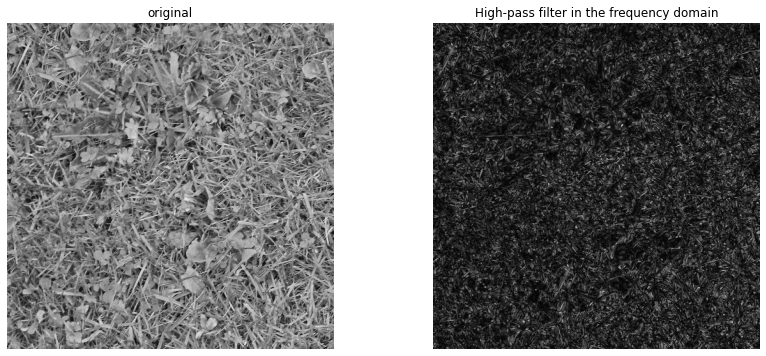

In [12]:
# High pass filter

rows, cols = img_grass.shape
crow,ccol = np.int(rows/2) , np.int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_grass_back = np.fft.ifft2(f_ishift)
img_grass_back = np.abs(img_grass_back)

plot_comparison(img_grass,img_grass_back, 'High-pass filter in the frequency domain')

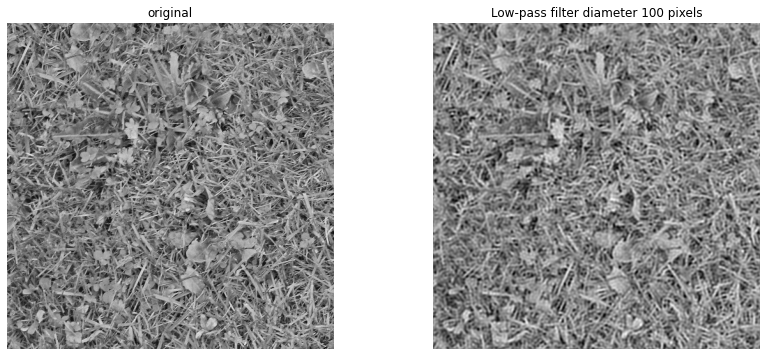

In [19]:
# Low pass filter
nrows, ncols = img_grass.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
disk_diameter = 100
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (disk_diameter)**2)

f = np.fft.fft2(img_grass)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fshift[outer_disk_mask] = 0
f_ishift = np.fft.ifftshift(fshift)
img_grass_back = np.fft.ifft2(f_ishift)
img_grass_back = np.abs(img_grass_back)

plot_comparison(img_grass,img_grass_back, 'Low-pass filter diameter {} pixels'.format(disk_diameter))

### Task 7
Task 7: Use the function binary_blobs to generate an image with random blobs: https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.binary_blobs How many consecutive morphological erosions are needed in order to remove all the blobs? Use a disk-shaped structuring element of radius 3 pixels (footprint). https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.disk

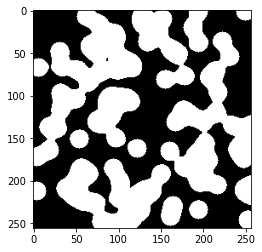

In [14]:
import matplotlib.pyplot as plt
from skimage.data import binary_blobs

# Generate a binary image with random blobs
blobs = binary_blobs(length=256, blob_size_fraction=0.1, seed=1)

# Display the image
plt.imshow(blobs, cmap='gray')
plt.show()

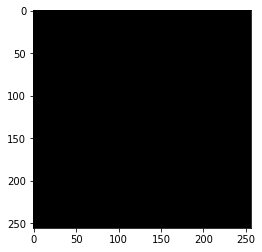

Number of consecutive morphological erosions needed: 8


In [17]:
import matplotlib.pyplot as plt
from skimage.morphology import binary_erosion, disk

# Define a disk-shaped structuring element with radius 3 pixels
selem = disk(3)

# Perform consecutive morphological erosions until all blobs are removed
n_erosions = 0
while blobs.any():
    blobs = binary_erosion(blobs, selem)
    n_erosions += 1

# Display the final image after all erosions
plt.imshow(blobs, cmap='gray')
plt.show()

print(f"Number of consecutive morphological erosions needed: {n_erosions}")
